<a href="https://colab.research.google.com/github/fatima2112/gaiaDR3ML/blob/master/Normalizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd


# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

data = pd.read_csv("../DATA/DR3/Sy/XP_CONTINUOUS-Gaia DR3 308866701872125568.csv")
data.head()

,source_id,solution_id,bp_basis_function_id,bp_degrees_of_freedom,bp_n_parameters,bp_n_measurements,bp_n_rejected_measurements,bp_standard_deviation,bp_chi_squared,bp_coefficients,...,rp_n_parameters,rp_n_measurements,rp_n_rejected_measurements,rp_standard_deviation,rp_chi_squared,rp_coefficients,rp_coefficient_errors,rp_coefficient_correlations,rp_n_relevant_bases,rp_relative_shrinking
0,308866701872125568,4545469030156206080,56,1117,55,1172,46,1.439717,2315.3008,"(4359777.273910325, 581384.9657800844, -77748....",...,55,1325,63,1.767027,3965.4263,"(1.5584199896418598E7, 2563048.137275565, 8089...","(11791.401, 12655.38, 11520.796, 10488.419, 11...","(-0.20425212, -0.13397367, 0.11055192, 0.03322...",32,0.999999


In [61]:
# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)

f = data

In [62]:
# El espectro calibrado que es un pandas DataFrame (calibrated_spectra)
calibrated_spectra, sampling = calibrate(f)
calibrated_spectra

,source_id,flux,flux_error
0,308866701872125568,"[1.8545887904429264e-14, 1.9515631422050145e-1...","[5.214474777878778e-15, 3.992541487358003e-15,..."


In [63]:
#Muestreo dado en Numpy, valores que corresponden en longitudes de onda (nm)
calibrated_spectra, sampling = calibrate(f)
sampling

array([ 336.,  338.,  340.,  342.,  344.,  346.,  348.,  350.,  352.,
        354.,  356.,  358.,  360.,  362.,  364.,  366.,  368.,  370.,
        372.,  374.,  376.,  378.,  380.,  382.,  384.,  386.,  388.,
        390.,  392.,  394.,  396.,  398.,  400.,  402.,  404.,  406.,
        408.,  410.,  412.,  414.,  416.,  418.,  420.,  422.,  424.,
        426.,  428.,  430.,  432.,  434.,  436.,  438.,  440.,  442.,
        444.,  446.,  448.,  450.,  452.,  454.,  456.,  458.,  460.,
        462.,  464.,  466.,  468.,  470.,  472.,  474.,  476.,  478.,
        480.,  482.,  484.,  486.,  488.,  490.,  492.,  494.,  496.,
        498.,  500.,  502.,  504.,  506.,  508.,  510.,  512.,  514.,
        516.,  518.,  520.,  522.,  524.,  526.,  528.,  530.,  532.,
        534.,  536.,  538.,  540.,  542.,  544.,  546.,  548.,  550.,
        552.,  554.,  556.,  558.,  560.,  562.,  564.,  566.,  568.,
        570.,  572.,  574.,  576.,  578.,  580.,  582.,  584.,  586.,
        588.,  590.,

### Normalization is a simple technique for comparisons.fallow the steps

1. Take maximum intensity value what you get in recording.

2. Now devide each intensity value with that maximum value.

3. Then all intensity values are in between 0 to 1.

In [64]:
#Se convierte el arreglo de la columna flux a una lista, para obtener el valor máximo
import numpy as np

columna1_array = calibrated_spectra['flux'].tolist()
# columna1_array

max_val = np.amax(columna1_array)
print(max_val) #Se imprime el valor máximo para comparar


3.2088139072235183e-13


In [65]:
#Se inicializa un nuevo arreglo para guardar los nuevos valores a calcular
columna2_array = []
for n in range(len(columna1_array)):
  columna2_array = columna1_array[n]/max_val #Se divide cada uno de los flujos entre el valor máximo obtenido
  
#Se imprime dicho arreglo que consta de valores que van desde 0 a 1
columna2_array

array([ 0.05779671,  0.06081883,  0.03864436,  0.02486251,  0.03584639,
        0.04809803,  0.04190533,  0.0337927 ,  0.04717162,  0.06266996,
        0.04720257,  0.02635203,  0.02999063,  0.04250031,  0.03850018,
        0.02287048,  0.02209573,  0.03990696,  0.04643146,  0.02531479,
        0.00298265,  0.01272875,  0.04262355,  0.04798678,  0.01887514,
       -0.00533353,  0.00415226,  0.02980513,  0.04043107,  0.02952689,
        0.01532347,  0.01644898,  0.03382688,  0.05316512,  0.06015504,
        0.05395471,  0.04581996,  0.04751942,  0.0607082 ,  0.07637322,
        0.08255113,  0.07491442,  0.05972438,  0.04879185,  0.05075741,
        0.06546873,  0.08476132,  0.09926365,  0.1041248 ,  0.10141356,
        0.0980286 ,  0.10038668,  0.11013611,  0.12443985,  0.1378898 ,
        0.1461728 ,  0.14834141,  0.14698249,  0.14664689,  0.15106067,
        0.16115261,  0.17527836,  0.18937722,  0.19996721,  0.20496329,
        0.20429499,  0.20087977,  0.19702854,  0.19564682,  0.19

In [66]:
#Se obtiene el número de elemento que se encuentra en cada columna, para ver si cuenta con la misma dimensión
print(len(calibrated_spectra['flux']))
print(len(columna2_array))


1
343


In [67]:
#Se toma el tipo de dato, viendo que se cuenta con tipos diferentes 
print(type(calibrated_spectra['flux']))
print(type(columna2_array))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [68]:
#Se crea un objeto tipo serie al cual se le agrega el arreglo obtenido
columna_serie=pd.Series([columna2_array])
columna_serie

0    [0.057796707570606405, 0.06081883208657738, 0....
dtype: object

In [69]:
#Con la misma longitud de cada serie, ya es posible hacer el cambio en las columnas
print(len(calibrated_spectra['flux']))
print(len(columna_serie))

1
1


In [70]:
#Se comprueba el mismo tipo de dato
print(type(calibrated_spectra['flux']))
print(type(columna_serie))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [71]:
#Se actualiza el dataFrame, con la columna de los flujos con valores normalizados
calibrated_spectra['flux'] = columna_serie
calibrated_spectra

,source_id,flux,flux_error
0,308866701872125568,"[0.057796707570606405, 0.06081883208657738, 0....","[5.214474777878778e-15, 3.992541487358003e-15,..."


Normalizado


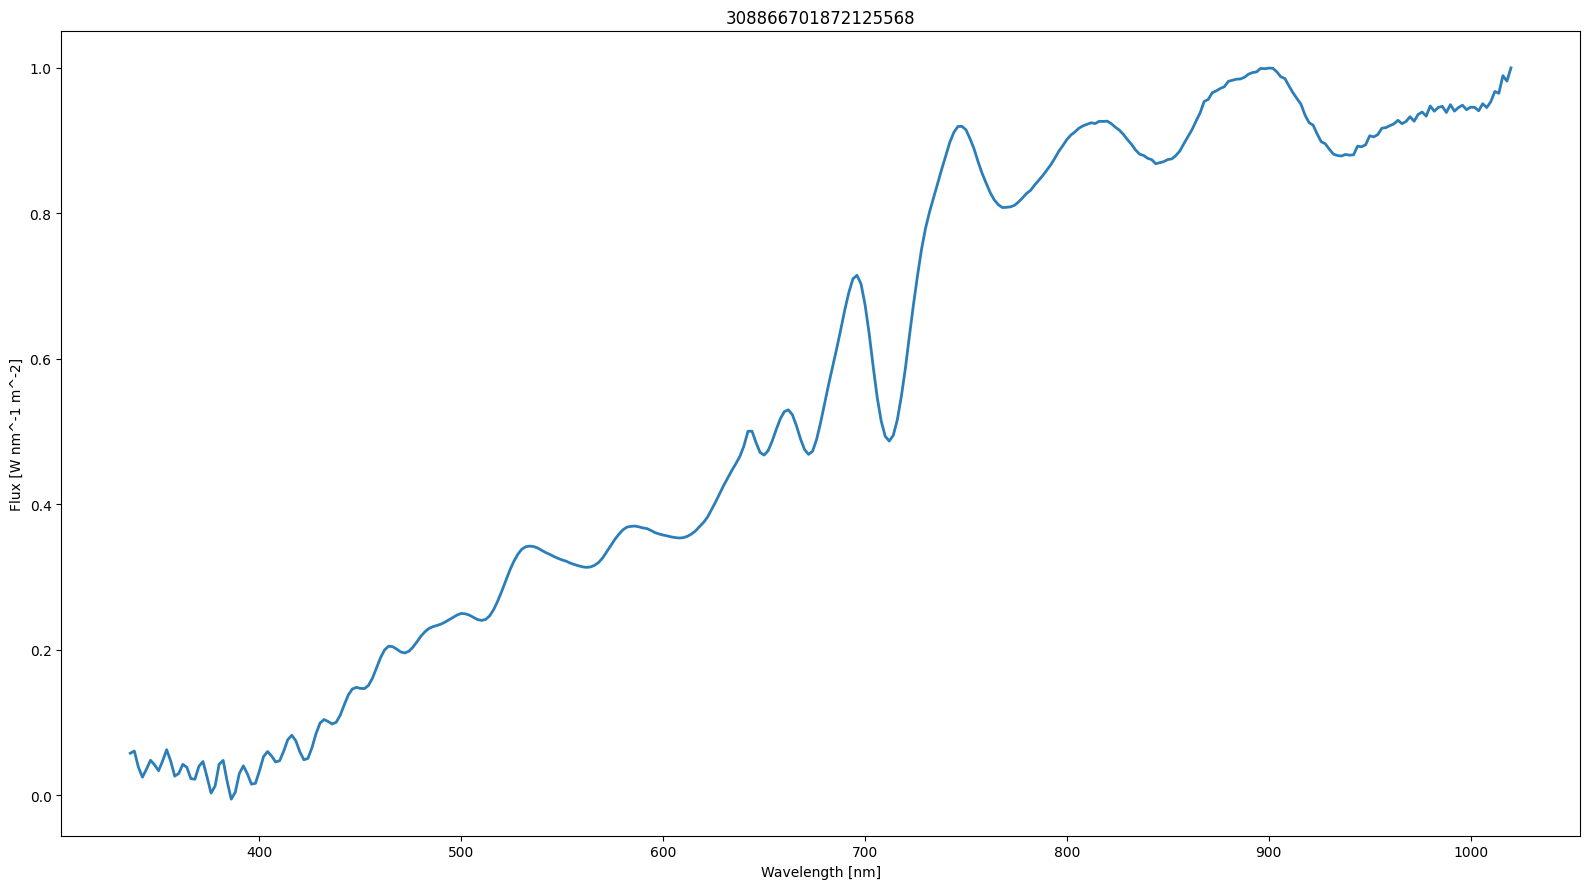

In [72]:
#Se realiza el gráfico con los nuevos valores, observando que ya quedan los valores comprendidos entre 0 y 1
from gaiaxpy import plot_spectra
print('Normalizado')
first=plot_spectra(calibrated_spectra, sampling=sampling)